# Lab Overview
This lab session will all be done by filling in the blanks in this Google Colab sheet.
You'll need a google account to continue, but it's pretty straightforward to sign up if you don't have one already.

The best thing to do would be to save a copy of this notebook in your personal google drive and edit it from there.

# Getting Data
**Getting an image from the web** (for uploading an image file, go to the section "Uploading an image file")

In [1]:
!wget "http://www.sussex.ac.uk/broadcast/images/uploads/2016/02/5848.item.jpg" -O sussex.jpg



--2020-02-14 10:50:01--  http://www.sussex.ac.uk/broadcast/images/uploads/2016/02/5848.item.jpg
Resolving www.sussex.ac.uk (www.sussex.ac.uk)... 139.184.32.51
Connecting to www.sussex.ac.uk (www.sussex.ac.uk)|139.184.32.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28074 (27K) [image/jpeg]
Saving to: ‘sussex.jpg’

sussex.jpg          100%[===================>]  27.42K  52.1KB/s    in 0.5s    

2020-02-14 10:50:02 (52.1 KB/s) - ‘sussex.jpg’ saved [28074/28074]



Images can be represented as matrices (2D arrays) or 3D tensors (in order to get RGB channels). [OpenCV](https://opencv.org), a popular Computer Vision package, is a great tool to work with images, and provides a lot really useful tools that you can use to edit, transform, and work with your images. Python's OpenCV is actually a wrapper on top of the C/C++ implementation of the library, which makes it really fast. In addition, everything in OpenCV can be converted to and from Numpy arrays, a really nice way to work with multidimensional objects like matrices and tensors. Like OpenCV, all Python calls to the Numpy library actually get converted and executed into C, which makes it really fast as well.

# Visualising images
Python has a great data visualisation library called [matplotlib](https://matplotlib.org/). 

Take a look at [this tutorial](https://matplotlib.org/3.1.1/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for how to display images. Note that Python has lots of mechanisms for reading image files, please try and stick to using OpenCV

1) Ascertain the data type and size of the image data

2) Display the image using matplotlib (see the lecture notes)

3) Convert it to grayscale (hint use a function in numpy) and display that

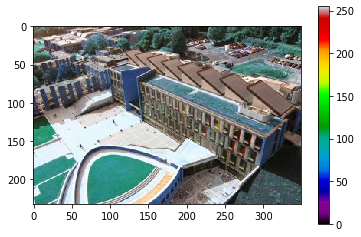

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

# - Displays image as is.
img = cv2.imread('./sussex.jpg')
imgplot = plt.imshow(img)

# - Displays one channel of our data
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)

# - Displays the luminosity (2D, no colour) replacing the default colourmap ("viridis") with "hot".
plt.imshow(lum_img, cmap = "hot")

# - Cmap (colourMap) can be changed on an existing plot using `set_cmap()`
imgplot = plt.imshow(lum_img)
imgplot.set_cmap("nipy_spectral")

# - Adds a colour bar; Can be useful to show what value a colour represents.
plt.colorbar()


# - ColourMapping
imgnew = np.mean(img, axis = 2)
plt.imshow(imgnew, cmap = "hot")

# - Interpolation
imgplot = plt.imshow(img, interpolation="bicubic")
imgplot = plt.imshow(img, interpolation="nearest")

Notice anything different about the colour image you plotted before? You'll see that the colors are off - this is because OpenCV uses a BGR ordering of their image channels, whereas when you want to plot in something other than OpenCV, you'll need to convert it. In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.

1) We can convert from BGR to RGB using opencv, but how could we do it using numpy? Convert and draw the image

2) Halve the image resolution (subsample by a factor of 2) just using numpy.



In [0]:
# Convert from BGR to RGB
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# - Convert jet to RGB / BGR to RGB reverse colour channels
imgrgb_final = img[:,:,::-1]
plt.imshow(imgrgb_final)


# Uploading an image file



Once you run the code below, a small gui with two buttons "Chose file" and "cancel upload" would appear, using these buttons you can choose any local file and upload it.

In [4]:
import cv2
from google.colab import files
uploaded = files.upload()

Saving 5848.item.jpg to 5848.item.jpg


In [5]:
# After executing the cell above, check the uploaded files names 
# and the folder path where your files were uploaded.
import os
!ls
os.getcwd()

5848.item.jpg  sample_data  sussex.jpg


'/content'

5848.item.jpg
/content/5848.item.jpg
sussex.jpg
/content/sussex.jpg


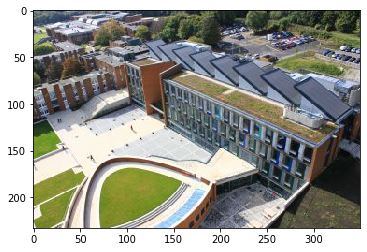

In [29]:
items = os.listdir('/content')
for each_image in items:
  if each_image.endswith(('.jpg', '.png')):
    print (each_image)
    full_path = "/content/" + each_image
    print (full_path)
    image = cv2.imread(full_path)
    # - Show image
    imgplot = plt.imshow(image)
    # - Show image with RGB colourMap
    imgrgb2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(imgrgb2)

# Image co-ordinate system
matplotlib allows you to plot lines, and points on top of the image. This can be very useful to convey information about where things are.

1) Experiment with plotting points and lines on top of the image. What do you notice about the coordinate system?

(233, 350, 3)


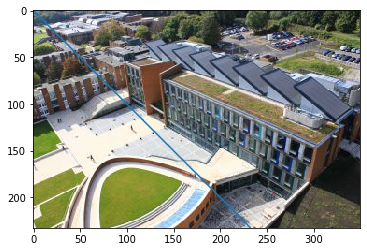

In [7]:
print(img.shape)
imgrgb3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb3)
x = np.arange(0, img.shape[0], 1)
y = np.arange(0,img.shape[1],1)
#plt.scatter(x,x)
plt.plot(x,x)

# Manipulating Image Pixels
Let's try making some changes to the images, and see how that affects things. For each of the edits, try not to overwrite the original image data (why not?)

1) Manipulate the colour of single specific pixels, or ranges of pixels. Note the different mechanisms for slicing through Python arrays. 

2) Threshold the image using numpy hint: there's a built in function beginning with np.c...

3) Try inceasing the brightness of the left side of the image.

4) What do the comparison operators return from an array? e.g. > 10, <40, == 38 etc.


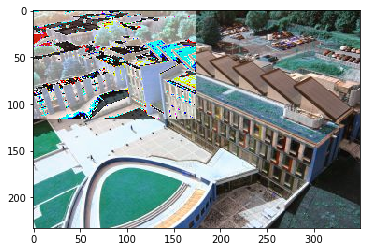

In [8]:
img_copy = img.copy()
# - img[x1:x2, y1:y2, :] += value
img_copy[0:int(img_copy.shape[0]/2),0:int(img_copy.shape[1]/2),:] += 100
plt.imshow(img_copy)

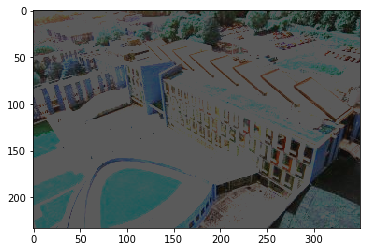

In [9]:
# - Threshold achieved using `np.clip()`
plt.imshow(np.clip(img,10,90))

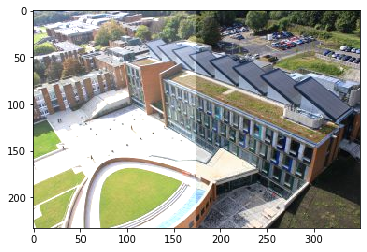

In [10]:
# - Change brightness
img_bright = img.copy().astype(np.uint16)
img_bright = cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB)

img_bright[:,0:int(img_bright.shape[1]/2),:] += 50
img_final = np.clip(img_bright,0,255)
plt.imshow(img_final)

#c = img_bright.astype(np.uint32)

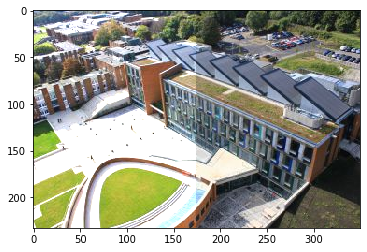

In [11]:
# - Tonino - Change brightness
img_bright = img.copy()
img_bright = cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB)

img_bright[:,0:int(img_copy.shape[1]/2),:] = np.clip(img_bright[:,0:int(img_copy.shape[1]/2),:]*1.3,0,255 )

#print(img_final[150:250, 0:100,:])
img_final = np.clip(img_bright,0,255)

plt.imshow(img_bright)

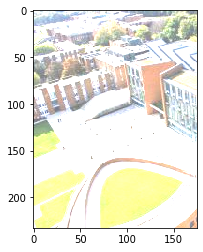

In [12]:
# - Will show half image brighter
plt.imshow(cv2.add(img_bright[:,0:int(img_copy.shape[1]/2),:], np.array([100.0])))

In [13]:
img[:,:,:] < 100

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False,  True],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

# Extensions
1) Draw each of the colour channels separately in the right colours. hint: Create a new image to draw each colour channel. use matpltolibs subplot functionality.

2) Make the centre of the image grayscale.

3) Make some interactive sliders to increase the brightness. (put any useful links for interactive controls into the Canvas discussion board).

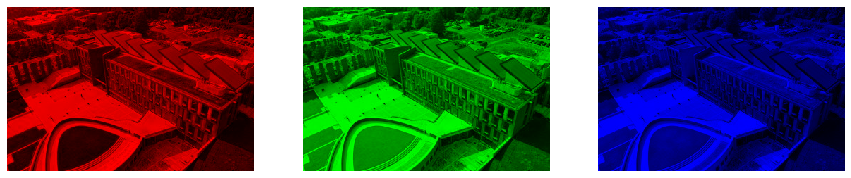

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(img.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = img[ :, :, c]
    
    # Axis values off
    ax.axis("off")

    # display each channel
    ax.imshow(split_img)

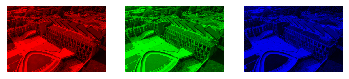

In [34]:
# - Colour Channels
for i in range(3):
  img_channel = np.zeros_like(img)
  img_channel[:,:,i] = imgrgb[:,:, i]
  plt.subplot(1,3,i+1)
  plt.imshow(img_channel)
  plt.axis('off')
plt.show()

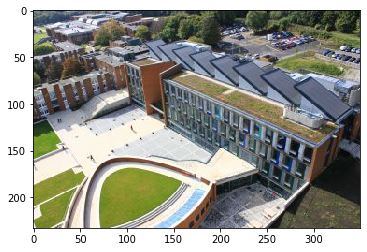

In [19]:
plt.imshow(img[:,:,::-1])

In [15]:
# - Set centre gray_scale
img_center = img.copy().astype(np.uint16)
img_center[int(img_center.shape[0]/2)-50:int(img_center.shape[0]/2)+50,int(img_center.shape[1]/2)-50:int(img_center.shape[1]/2)+50,:] = 
plt.imshow(img_center)

SyntaxError: ignored

In [0]:
img_grey = img.copy()
img_grey = img_grey.astype(np.uint32)

img_grey[int(img_center.shape[0]/2)-50:int(img_center.shape[0]/2)+50,int(img_center.shape[1]/2)-50:int(img_center.shape[1]/2)+50,0] = np.average(img_grey, axis = -1)
plt.imshow(img_grey, interpolation = "nearest", cmap = plt.get_cmap("gray"))
plt.show()

## **Slider for changing Brightness**

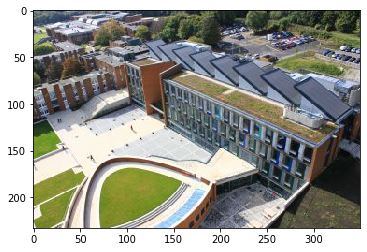

25


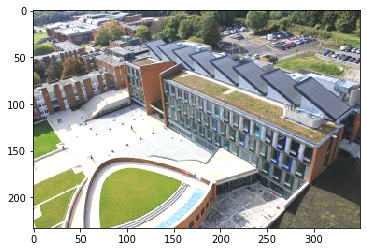

50


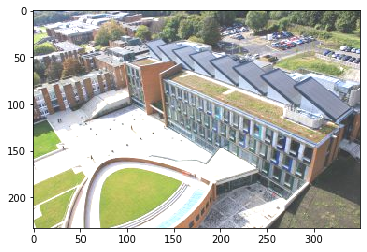

75


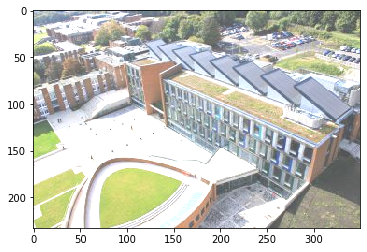

100


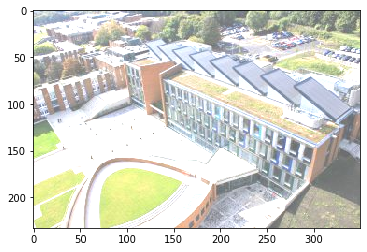

In [32]:
# - Slider: Change brightness
import ipywidgets as widgets
from matplotlib.widgets import Slider, Button

slider = widgets.IntSlider(step=25)
text = widgets.IntText()

img_slider = img.copy().astype(np.uint16)
img_slider = cv2.cvtColor(img_slider, cv2.COLOR_BGR2RGB)
plt.imshow(img_slider)

def value_changed(change):
    plt.close()
    img_slider = img.copy().astype(np.uint16)
    img_slider = cv2.cvtColor(img_slider, cv2.COLOR_BGR2RGB)
    img_slider[:,:,:] += int(change.new)
    print(change.new)
    img_final = np.clip(img_slider,0,255)
    plt.imshow(img_final)


slider.observe(value_changed, 'value')
widgets.VBox([slider])